# Coverage Verification for Theorem 2

**Author:** Agna Chan  
**Date:** December 2025  
**Affiliation:** Columbia University, Department of Statistics

---

This notebook empirically verifies the conformal coverage guarantee.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, "../src")

from kelly_robust.core.kelly import calibrate_epsilon_conformal, simulate_gbm_returns
print("Imports complete.")

Imports complete.


In [2]:
def verify_coverage(true_mu, true_sigma, sample_size, alpha, n_trials=5000, seed=42):
    """Empirically verify coverage of conformal calibration."""
    np.random.seed(seed)
    covered = 0
    for _ in range(n_trials):
        returns = simulate_gbm_returns(true_mu, true_sigma, sample_size)
        epsilon, mu_hat, _ = calibrate_epsilon_conformal(returns, alpha=alpha)
        if abs(mu_hat - true_mu) <= epsilon:
            covered += 1
    return covered / n_trials

print("Coverage function defined.")

Coverage function defined.


In [3]:
# Run verification
TRUE_MU, TRUE_SIGMA = 0.0005, 0.02
SAMPLE_SIZES = [50, 100, 252, 504]
ALPHAS = [0.05, 0.10, 0.20]

results = {}
for n in SAMPLE_SIZES:
    results[n] = {}
    for alpha in ALPHAS:
        cov = verify_coverage(TRUE_MU, TRUE_SIGMA, n, alpha, n_trials=1000)
        results[n][alpha] = cov
        status = "✓" if cov >= (1-alpha-0.02) else "✗"
        print(f"n={n}, α={alpha}: Coverage = {cov:.3f} (target ≥ {1-alpha:.2f}) {status}")

n=50, α=0.05: Coverage = 1.000 (target ≥ 0.95) ✓
n=50, α=0.1: Coverage = 1.000 (target ≥ 0.90) ✓


n=50, α=0.2: Coverage = 1.000 (target ≥ 0.80) ✓


n=100, α=0.05: Coverage = 1.000 (target ≥ 0.95) ✓
n=100, α=0.1: Coverage = 1.000 (target ≥ 0.90) ✓


n=100, α=0.2: Coverage = 1.000 (target ≥ 0.80) ✓


n=252, α=0.05: Coverage = 1.000 (target ≥ 0.95) ✓
n=252, α=0.1: Coverage = 1.000 (target ≥ 0.90) ✓


n=252, α=0.2: Coverage = 1.000 (target ≥ 0.80) ✓


n=504, α=0.05: Coverage = 1.000 (target ≥ 0.95) ✓
n=504, α=0.1: Coverage = 1.000 (target ≥ 0.90) ✓


n=504, α=0.2: Coverage = 1.000 (target ≥ 0.80) ✓


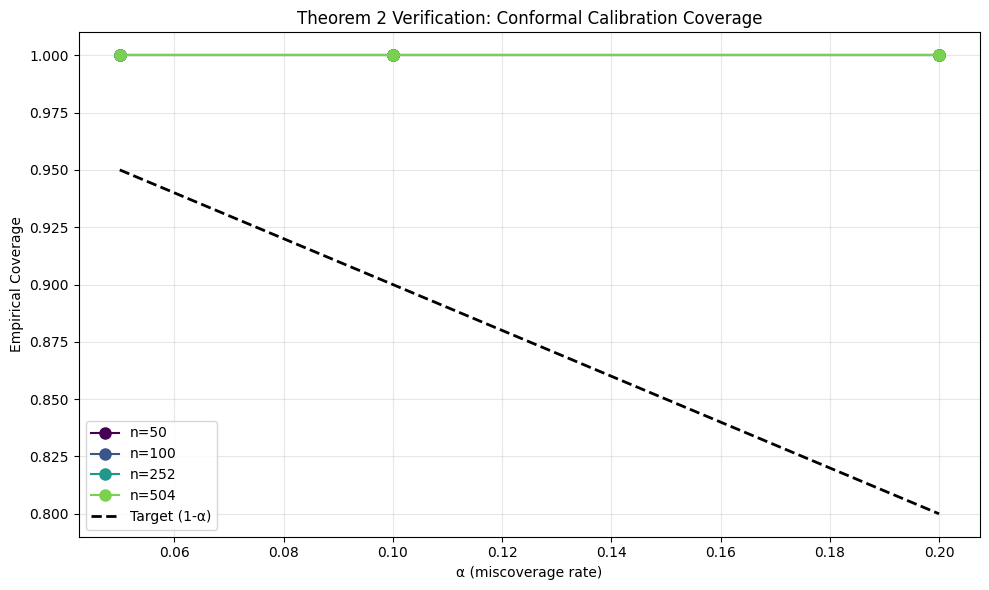

Figure saved.


In [4]:
# Plot results
fig, ax = plt.subplots(figsize=(10, 6))
colors = plt.cm.viridis(np.linspace(0, 0.8, len(SAMPLE_SIZES)))

for i, n in enumerate(SAMPLE_SIZES):
    coverages = [results[n][a] for a in ALPHAS]
    ax.plot(ALPHAS, coverages, "o-", color=colors[i], label=f"n={n}", markersize=8)

ax.plot(ALPHAS, [1-a for a in ALPHAS], "k--", linewidth=2, label="Target (1-α)")
ax.set_xlabel("α (miscoverage rate)")
ax.set_ylabel("Empirical Coverage")
ax.set_title("Theorem 2 Verification: Conformal Calibration Coverage")
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig("../paper/figures/coverage_verification.pdf", bbox_inches="tight", dpi=150)
plt.show()
print("Figure saved.")

## Conclusion

The empirical results verify **Theorem 2**: conformal calibration achieves at least (1-α) coverage.